# Data Project - Stock Market Analysis 

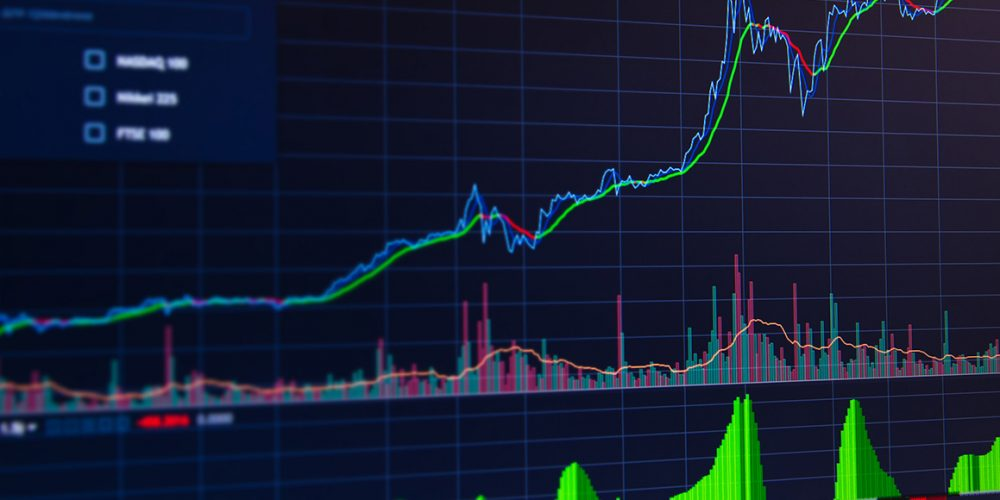

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance
!pip install pandas_datareader



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Set styles for better visualization
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define the tech stock tickers and company names
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Set start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data and store it in a list
company_data = []

for stock, name in zip(tech_list, company_names):
    df = yf.download(stock, start, end).dropna()
    df["Ticker"] = stock  # Add a column for stock symbol
    df["company_name"] = name  # Add a column for company name
    company_data.append(df)

# Concatenate all data into a single DataFrame
df = pd.concat(company_data)

# Reset index for better readability
df.reset_index(inplace=True)

# Display first 10 rows
print(df.head(10))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open  \
Ticker                   AAPL        AAPL        AAPL        AAPL   
0      2024-04-08  167.658356  168.404831  167.449351  168.235632   
1      2024-04-09  168.872604  169.280681  167.558816  167.907162   
2      2024-04-10  166.991486  168.295327  166.324636  168.006696   
3      2024-04-11  174.217361  174.635401  167.369706  167.548852   
4      2024-04-12  175.720276  177.521767  173.391277  173.441030   
5      2024-04-15  171.878418  175.799904  171.689308  174.535868   
6      2024-04-16  168.583984  172.943390  167.479200  170.942841   
7      2024-04-17  167.210464  169.848004  167.210464  168.812899   
8      2024-04-18  166.254959  167.847446  165.767272  167.240312   
9      2024-04-19  164.224548  165.617963  163.308874  165.428868   

Price        Volume Ticker company_name Close High  ... Close High  Low Open  \
Ticker         AAPL                      GOOG GOOG  ...  MSFT MSFT MSFT MSFT   
0        37

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [3]:
# Summary Stats
AAPL.describe()

NameError: name 'AAPL' is not defined

We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [6]:
# General info
AAPL.info()

NameError: name 'AAPL' is not defined

## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

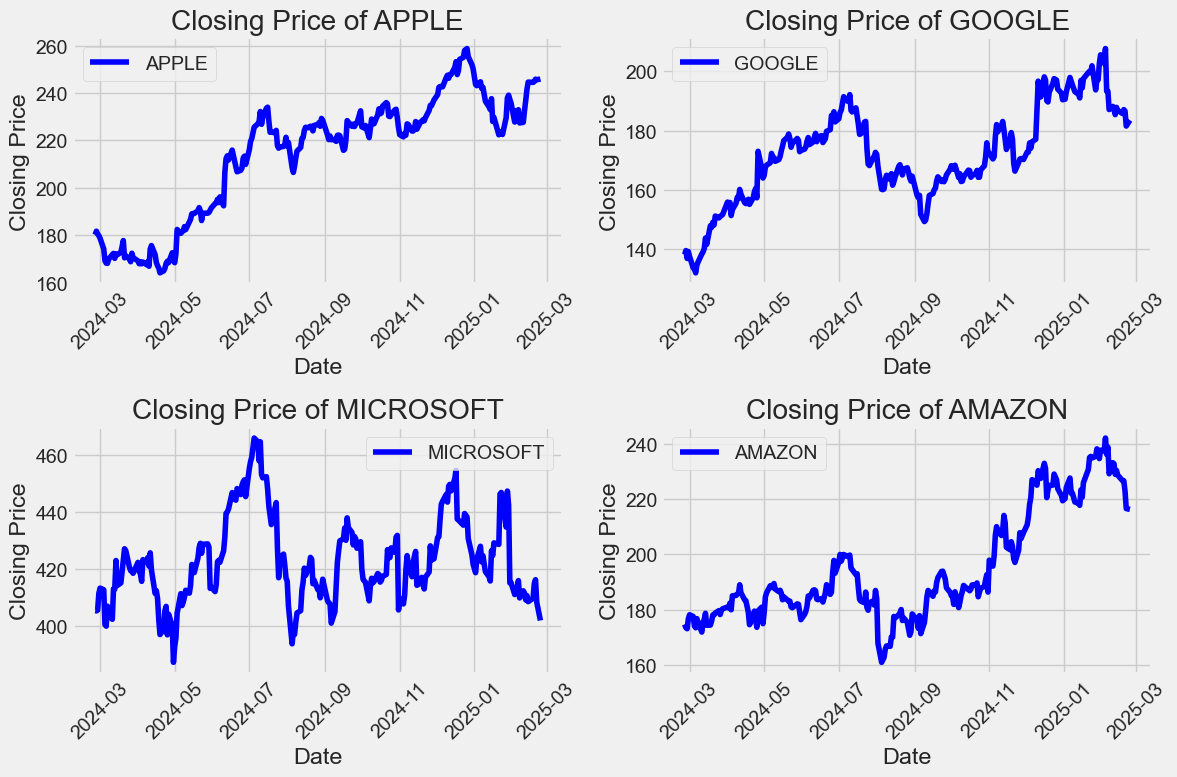

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Adjusting figure size and layout
plt.figure(figsize=(12, 8))  
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)  # Adjust spacing

# Loop through the company data and plot
for i, (company, name) in enumerate(zip(company_data, company_names), 1):
    plt.subplot(2, 2, i)  # Creates a 2x2 subplot grid
    plt.plot(company.index, company['Close'], label=name, color='blue')
    
    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {name}")
    plt.legend()
    
    # Format x-axis to show YYYY-MM
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
    plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.tight_layout()  # Ensures proper layout without overlap
plt.show()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

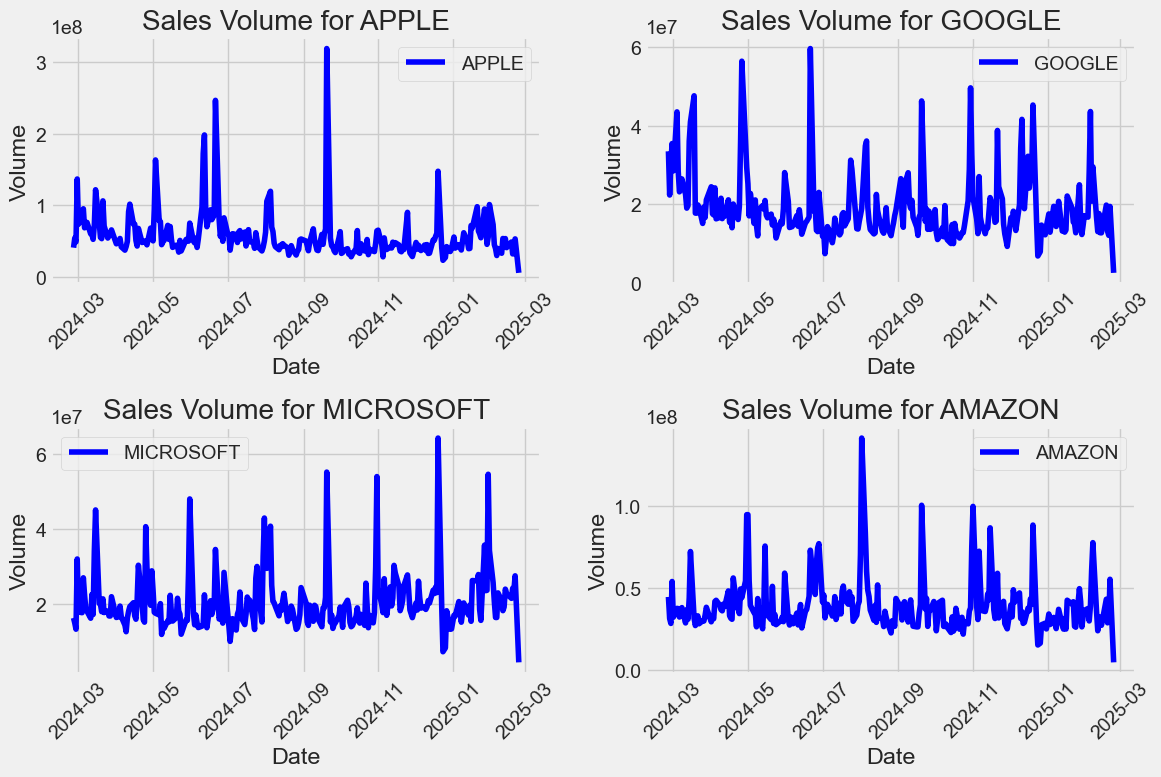

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Adjusting figure size and layout
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)  # Adjust spacing

# Loop through the company data and plot
for i, (company, name) in enumerate(zip(company_data, company_names), 1):
    plt.subplot(2, 2, i)  # Creates a 2x2 subplot grid
    plt.plot(company.index, company['Volume'], label=name, color='blue')

    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {name}")
    plt.legend()
    
    # Format x-axis to show YYYY-MM
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
    plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.tight_layout()  # Ensures proper layout without overlap
plt.show()


Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

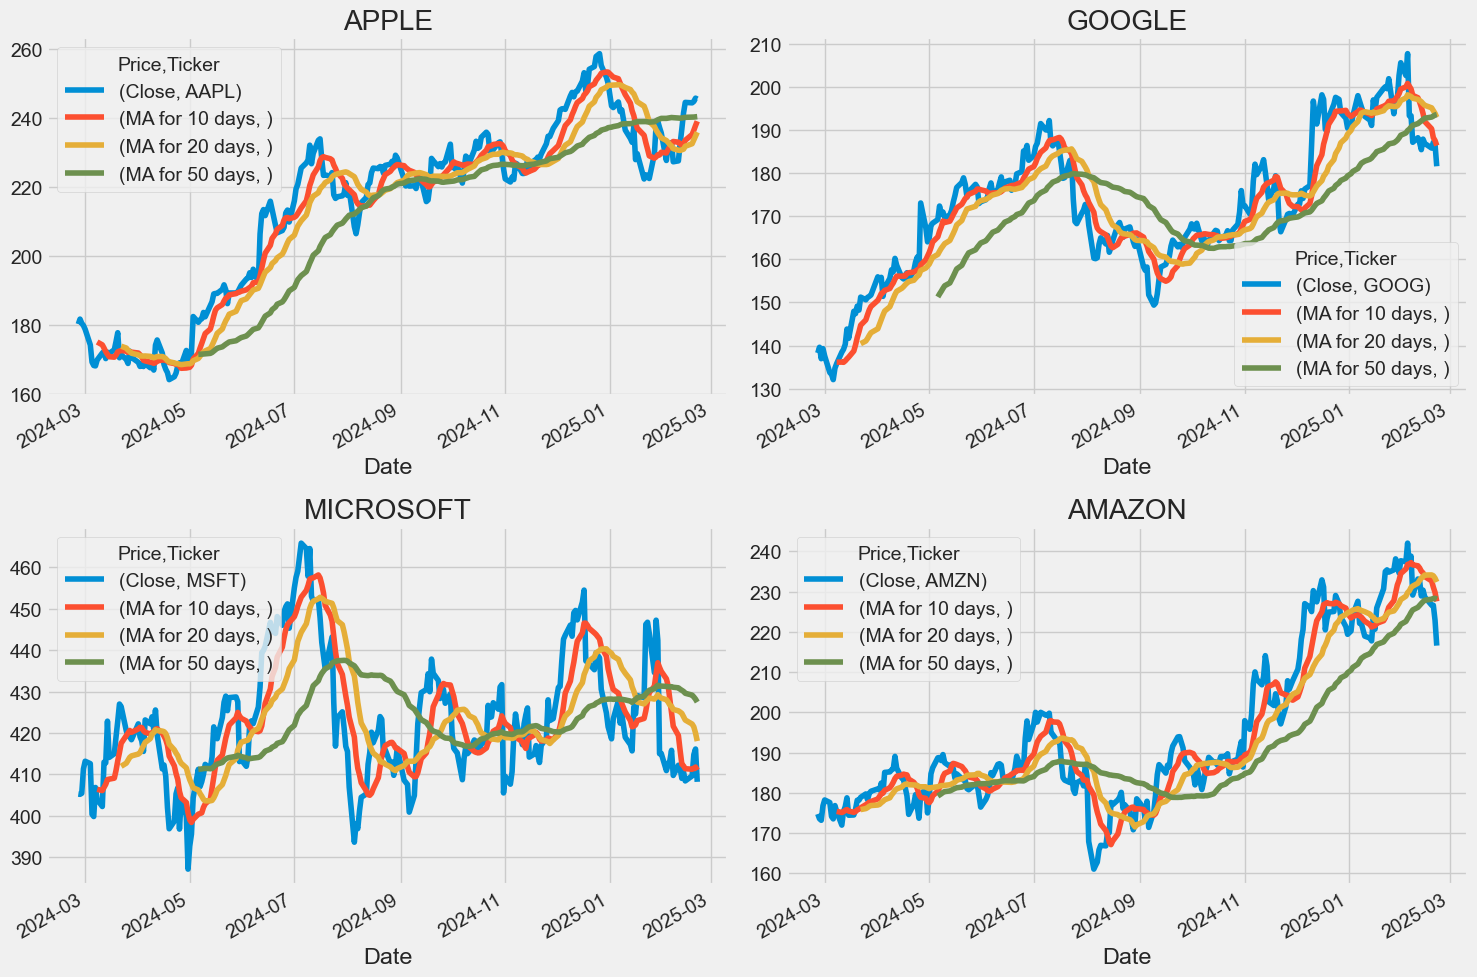

In [34]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

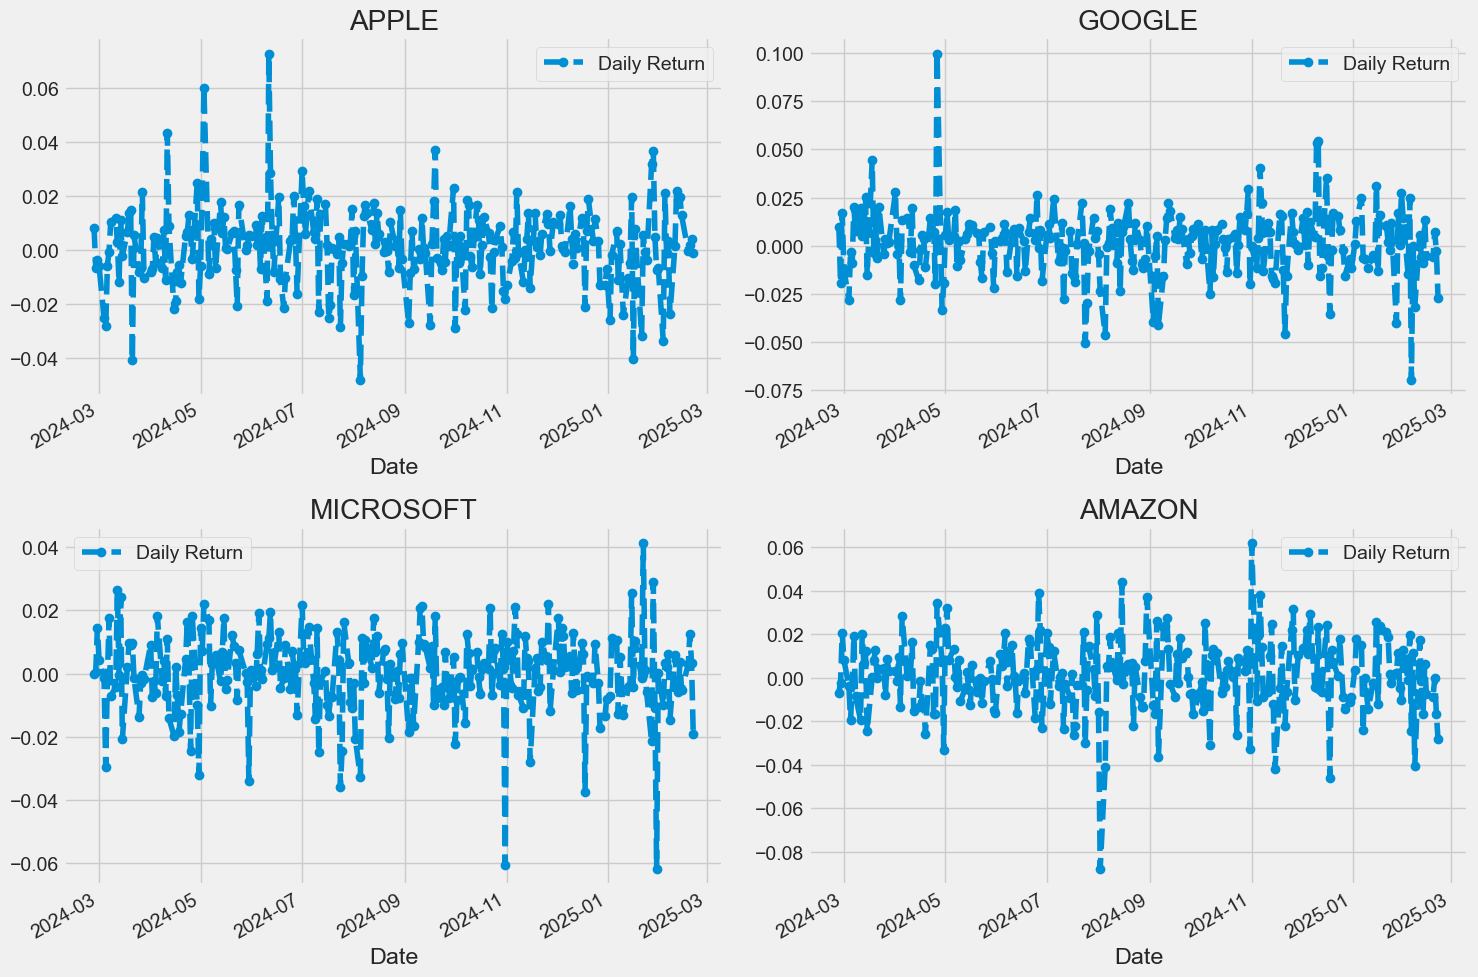

In [35]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

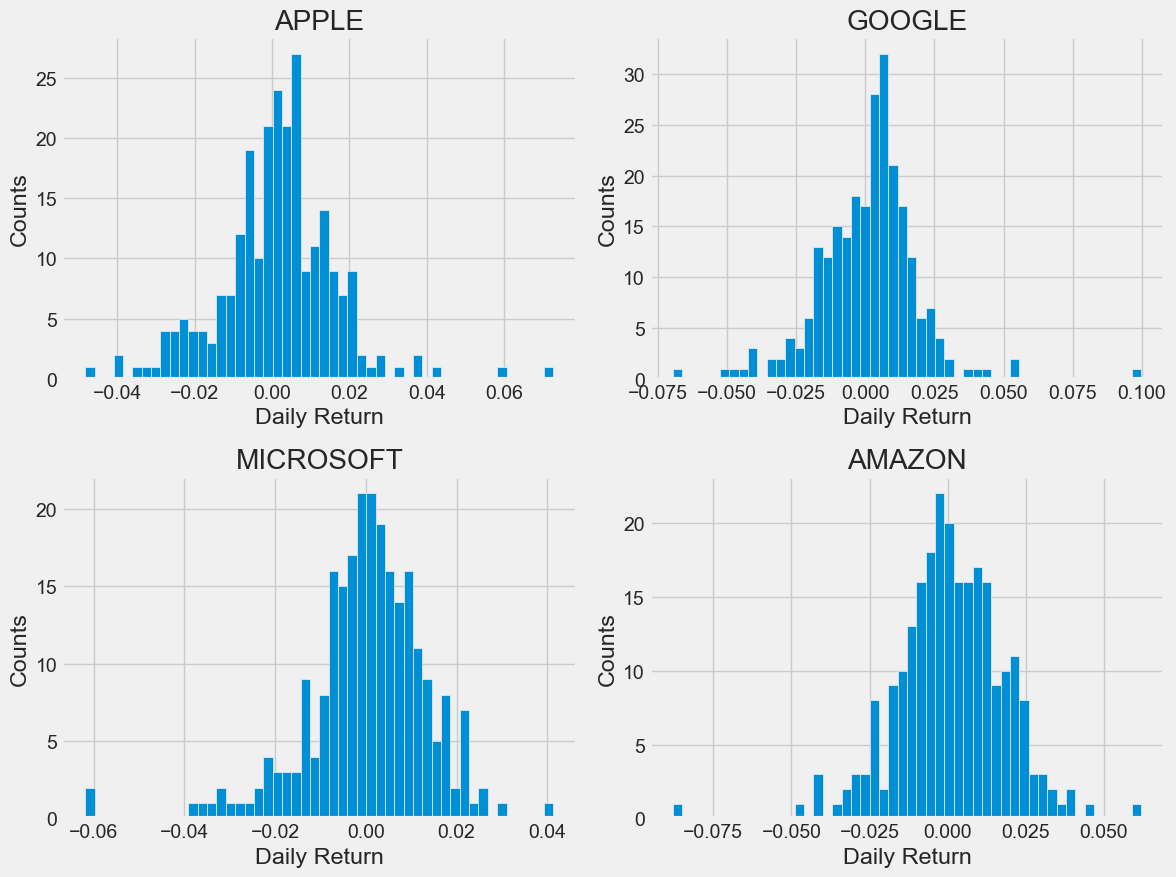

In [36]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [37]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-02-26,NaN,NaN,NaN,NaN
2024-02-27,0.008114,-0.006811,0.009730,-0.000147
2024-02-28,-0.006625,-0.002190,-0.019058,0.000589
2024-02-29,-0.003693,0.020790,0.017100,0.014520
2024-03-01,-0.006030,0.008260,-0.012162,0.004497


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

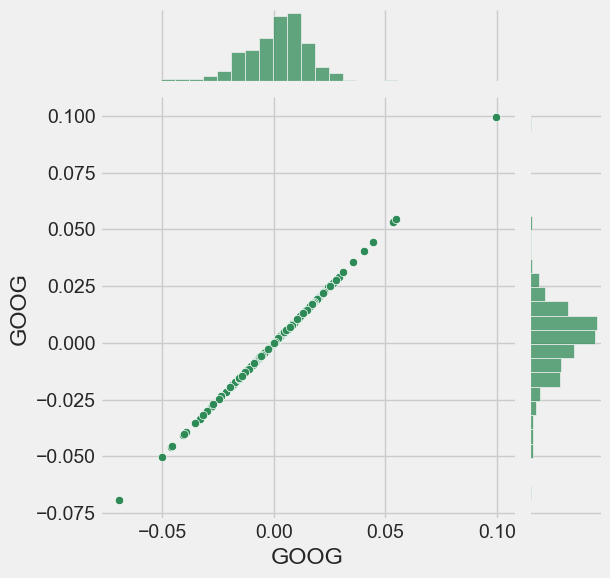

In [38]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

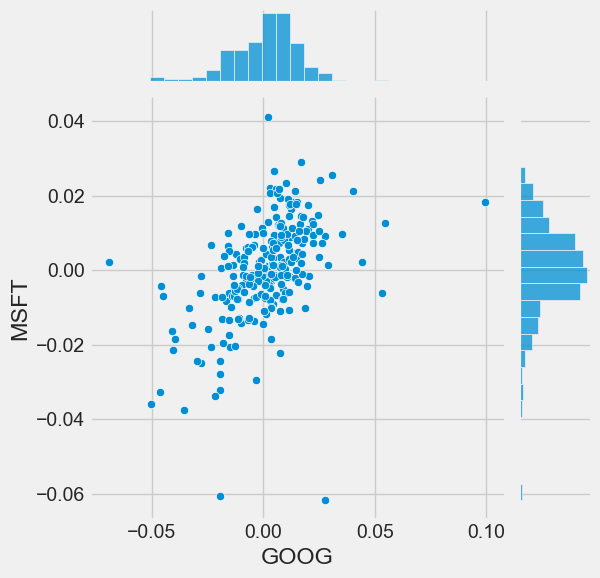

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\Users\ANSHUMAN\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


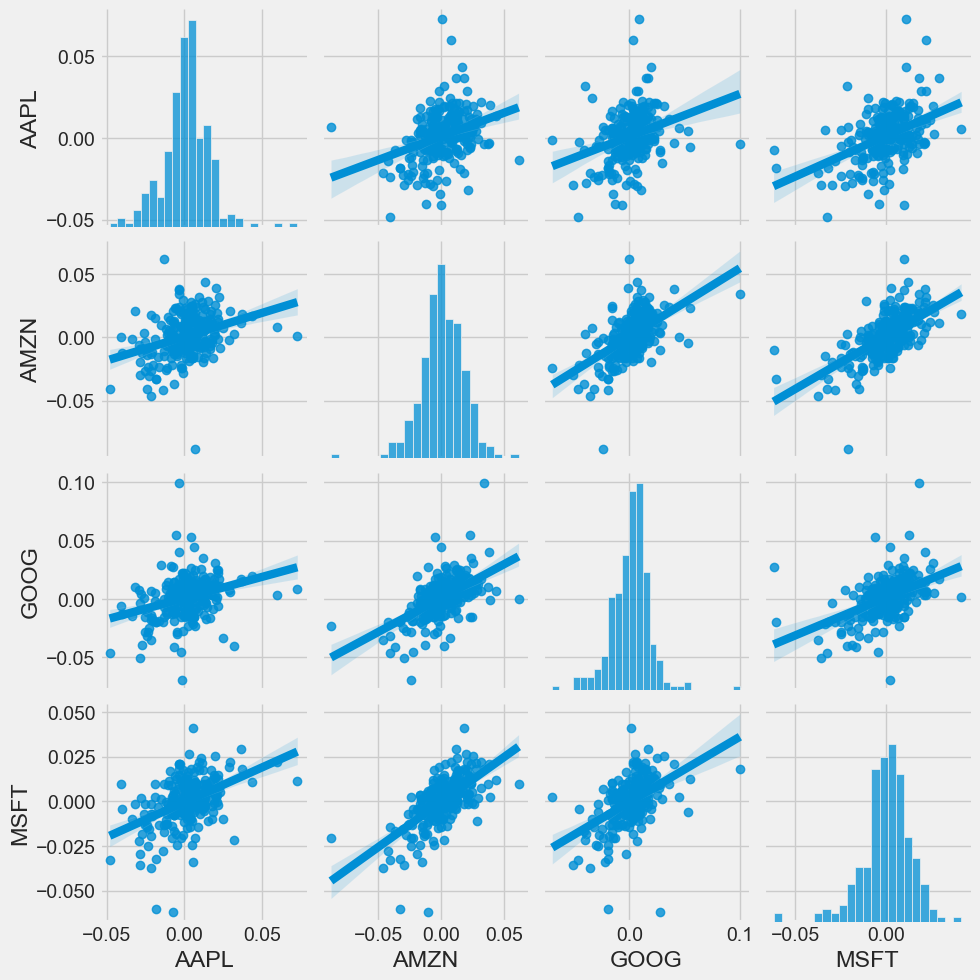

In [39]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

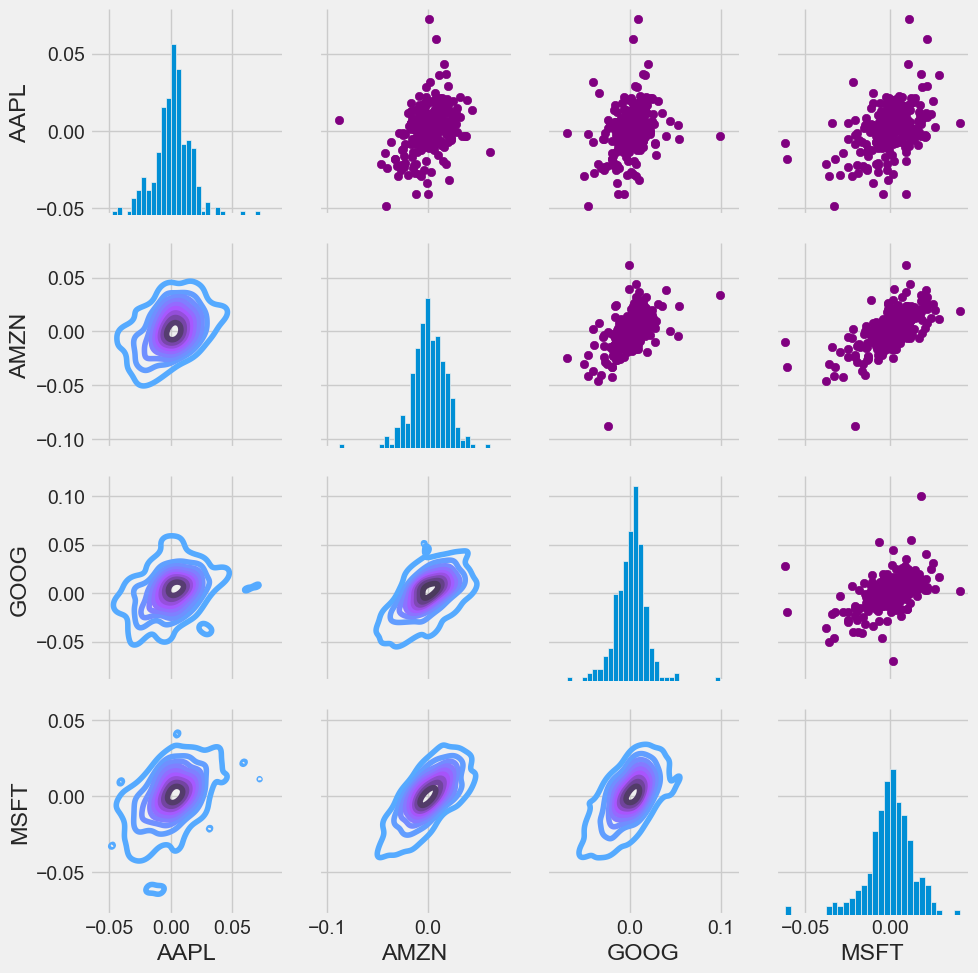

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

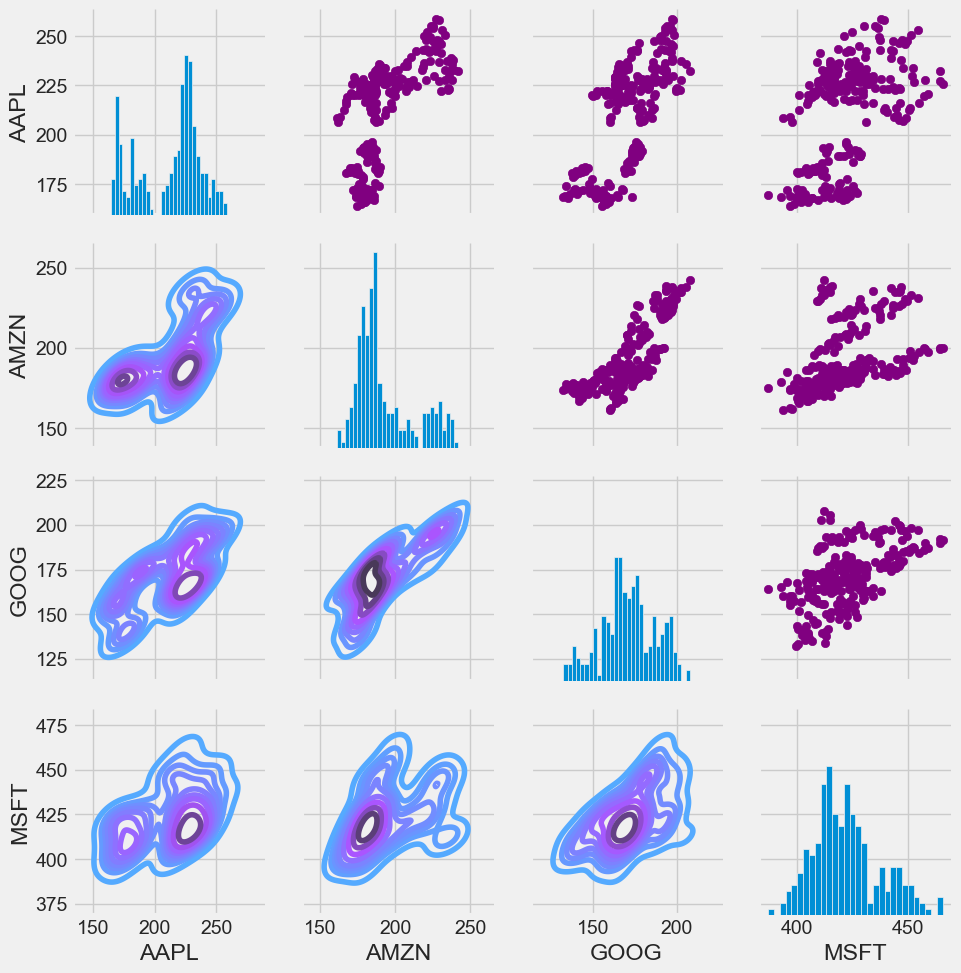

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

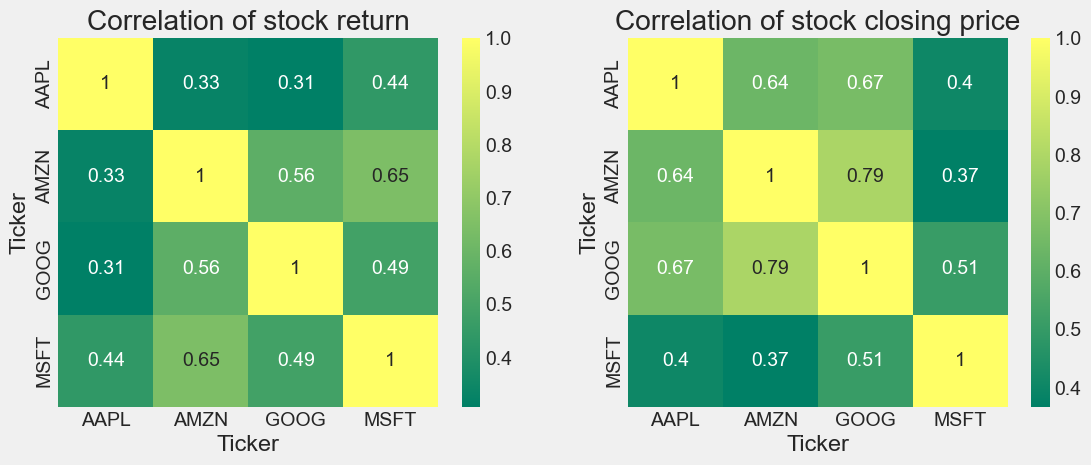

In [41]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

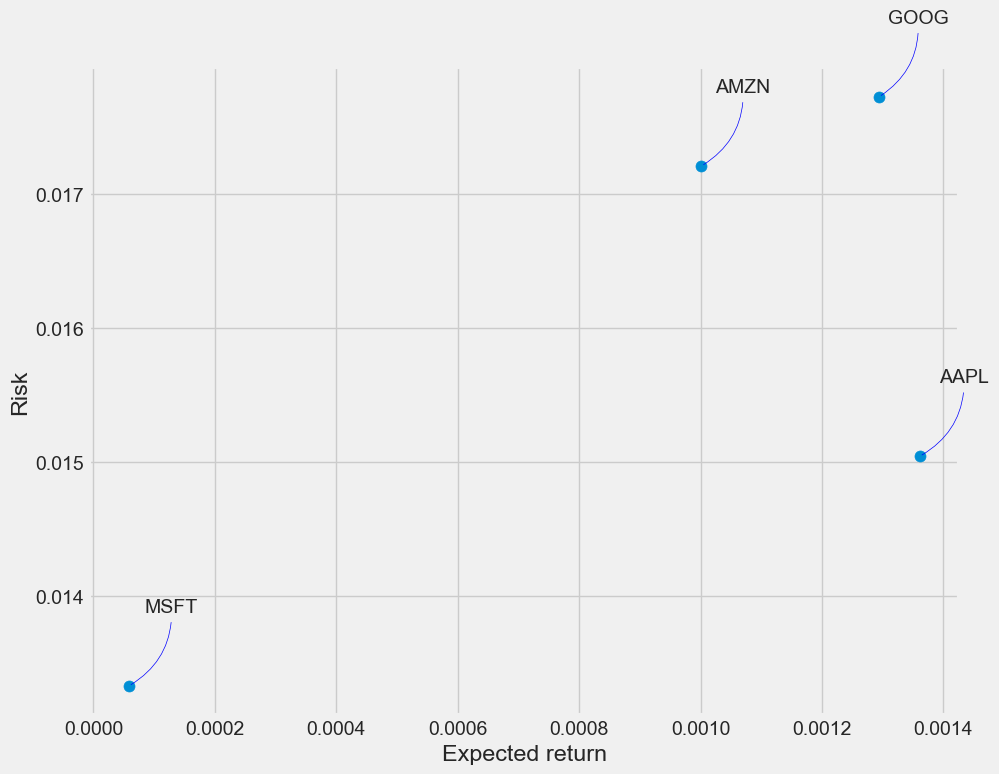

In [42]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [43]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375387,12.413607,12.308279,12.320317,302220800
2012-01-04,12.441898,12.479215,12.316709,12.338376,260022000
2012-01-05,12.580028,12.595676,12.418725,12.487340,271269600
2012-01-06,12.711537,12.722070,12.615840,12.632391,318292800
2012-01-09,12.691377,12.872540,12.679941,12.804830,394024400
...,...,...,...,...,...
2025-02-18,244.470001,245.179993,241.839996,244.149994,48822500
2025-02-19,244.869995,246.009995,243.160004,244.660004,32204200


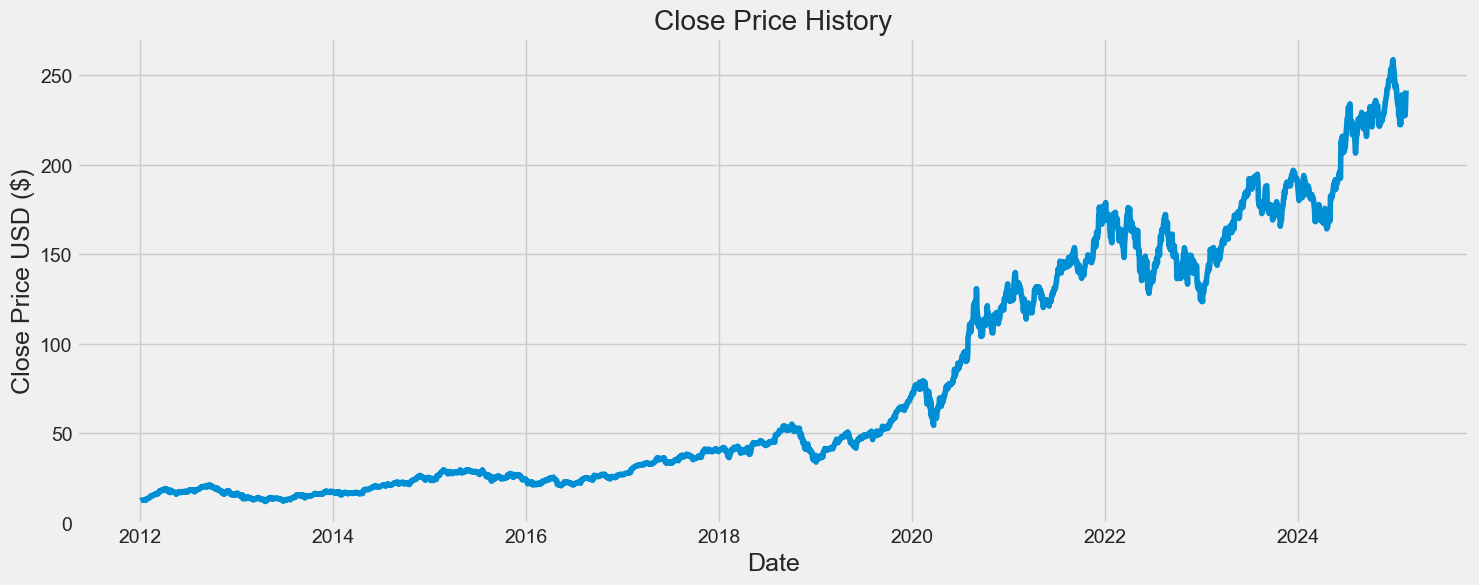

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Trial 10 Complete [00h 00m 48s]
val_loss: 0.0006080373423174024

Best val_loss So Far: 0.000503420946188271
Total elapsed time: 00h 07m 53s
Epoch 1/50


C:\Users\ANSHUMAN\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 6.3696e-04 - val_loss: 5.0534e-04
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 4.6882e-04 - val_loss: 4.8779e-04
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 4.0935e-04 - val_loss: 0.0012
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 3.9893e-04 - val_loss: 5.4346e-04
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 3.3786e-04 - val_loss: 0.0012
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 3.9276e-04 - val_loss: 7.4269e-04
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 3.1548e-04 - val_loss: 6.8593e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
RMSE: 7.445575253925027


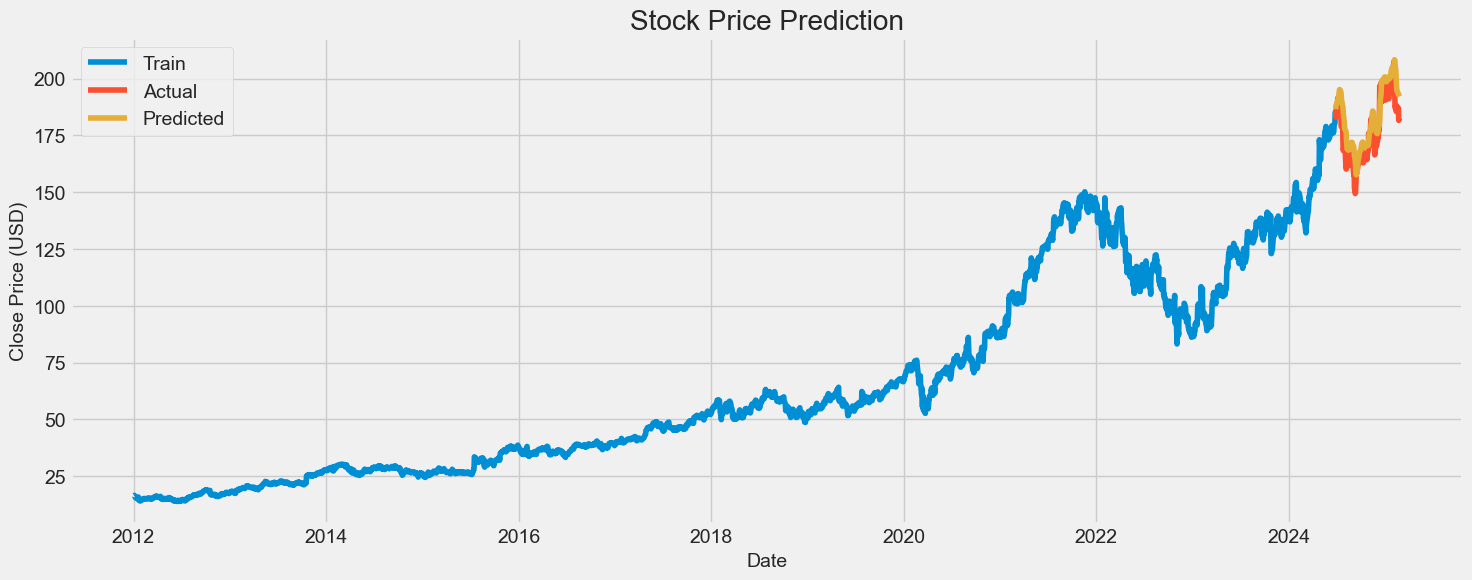

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
import keras_tuner as kt

# Remove outliers using IQR method
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Close'] >= (Q1 - 1.5 * IQR)) & (df['Close'] <= (Q3 + 1.5 * IQR))]

# Prepare data
data = df[['Close']]  # Ensure DataFrame format
dataset = data.values.reshape(-1, 1)  # Reshape for MinMaxScaler
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split training and testing data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 60:]

# Prepare x_train and y_train
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Define Hyperparameter Tuning function
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=64, max_value=256, step=32),
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    directory='lstm_tuning',
    project_name='stock_prediction'
)

tuner.search(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Train best model
best_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
               callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Prepare x_test and y_test
x_test, y_test = [], dataset[training_data_len:].reshape(-1, 1)

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test).reshape((len(x_test), 60, 1))

# Predict and inverse transform
predictions = best_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f"RMSE: {rmse}")

# Plot results
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.title('Stock Price Prediction')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.plot(train.index, train['Close'], label='Train')
plt.plot(valid.index, valid[['Close', 'Predictions']], label=['Actual', 'Predicted'])
plt.legend()
plt.show()


### Prediction Using GRU

In [55]:
# Get the stock quote
df = yf.download('GOOG', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...
2025-02-18,185.800003,187.779999,183.580002,187.440002,19796000
2025-02-19,187.130005,187.360001,185.500000,186.184998,13120500


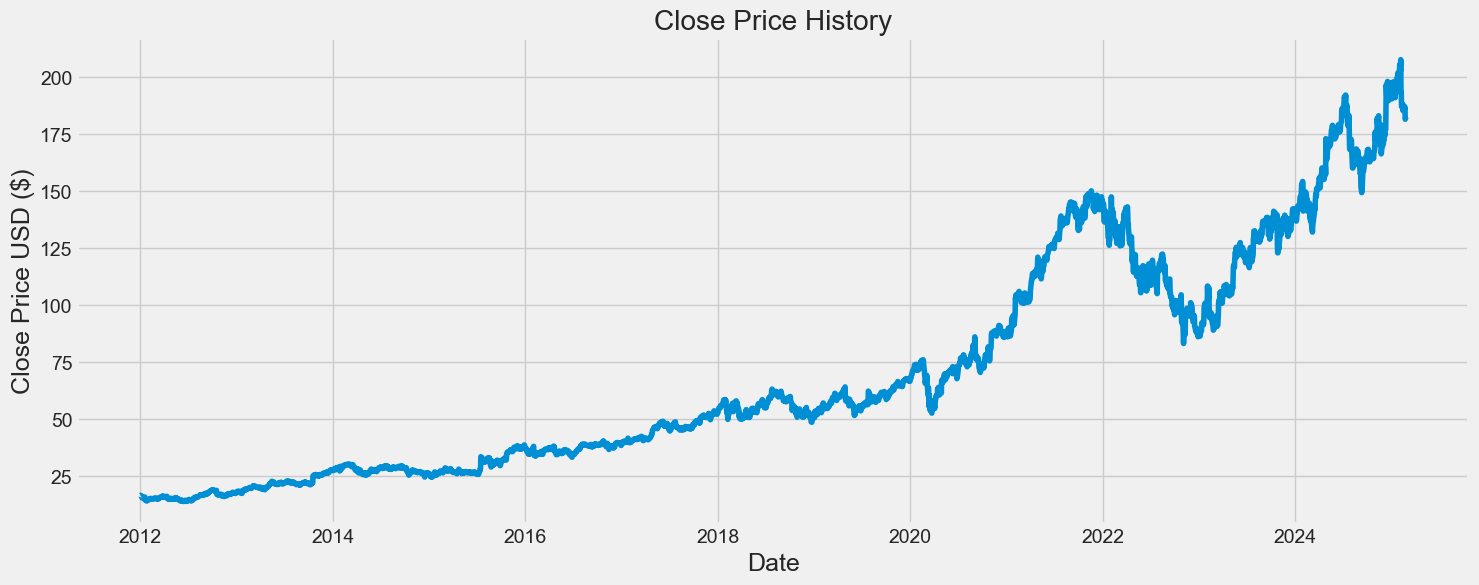

In [56]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [57]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Close'] > (Q1 - 1.5 * IQR)) & (df['Close'] < (Q3 + 1.5 * IQR))]

In [58]:
# Create a new dataframe with only the 'Close column
data = df['Close']
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len)
data

3140


Ticker,GOOG
Date,
2012-01-03,16.513794
2012-01-04,16.585020
2012-01-05,16.354963
2012-01-06,16.131853
2012-01-09,15.447884
...,...
2025-02-18,185.800003
2025-02-19,187.130005
2025-02-20,186.639999


In [59]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01361764],
       [0.0139851 ],
       [0.01279823],
       ...,
       [0.89129971],
       [0.86519515],
       [0.87032834]])

In [60]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01361764, 0.0139851 , 0.01279823, 0.01164721, 0.0081186 ,
       0.00820567, 0.00856672, 0.00903788, 0.00844253, 0.00890217,
       0.00945656, 0.01030925, 0.00344922, 0.00338904, 0.00280138,
       0.00133668, 0.0011587 , 0.00267974, 0.00238654, 0.00269639,
       0.00278857, 0.00333655, 0.00477309, 0.0064068 , 0.00610976,
       0.0065041 , 0.00671024, 0.00599965, 0.00680498, 0.00649257,
       0.00595484, 0.00607775, 0.00583705, 0.00703544, 0.00625955,
       0.00602526, 0.0065105 , 0.00643497, 0.00759751, 0.00757959,
       0.00811092, 0.00796369, 0.00706745, 0.00587802, 0.0061136 ,
       0.00615713, 0.00527498, 0.00590234, 0.00751941, 0.00729024,
       0.00794832, 0.00844893, 0.00959354, 0.00953081, 0.01036175,
       0.01113891, 0.01069592, 0.01155885, 0.01126311, 0.01238212])]
[0.011441077844187048]

[array([0.01361764, 0.0139851 , 0.01279823, 0.01164721, 0.0081186 ,
       0.00820567, 0.00856672, 0.00903788, 0.00844253, 0.00890217,
       0.00945656, 0.01030925, 0.0

In [61]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout
def build_gru_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units_1', min_value=50, max_value=200, step=50),
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(GRU(units=hp.Int('units_2', min_value=50, max_value=200, step=50)))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#tuner = kt.RandomSearch(build_gru_model, objective='val_loss', max_trials=10)
# Use Keras Tuner for hyperparameter tuning
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=5,
    directory='my_dir_2',  # Specify a directory to save results
    project_name='stock_prediction_gru'  # Specify a project name
)


tuner.search(x_train, y_train, epochs=10, validation_split=0.2)

Trial 5 Complete [00h 00m 53s]
val_loss: 0.000501185015309602

Best val_loss So Far: 0.0004778095171786845
Total elapsed time: 00h 03m 27s


In [62]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

best_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20


C:\Users\ANSHUMAN\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 4.7559e-04 - val_loss: 4.5015e-04
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 1.8362e-04 - val_loss: 0.0015
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.4058e-04 - val_loss: 4.8831e-04
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 1.7790e-04 - val_loss: 3.7870e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.3501e-04 - val_loss: 3.9332e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 1.2814e-04 - val_loss: 6.3551e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.6655e-04 - val_loss: 3.5830e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 1.8820e-04 - val_loss: 4.1332e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 1.5600e-04 - val_loss: 3.2519e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.1579e-04 - val_loss: 3.2085e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.3578e-04 - val_loss: 3

In [63]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = best_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


4.536676618778515

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_18716\1634493582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


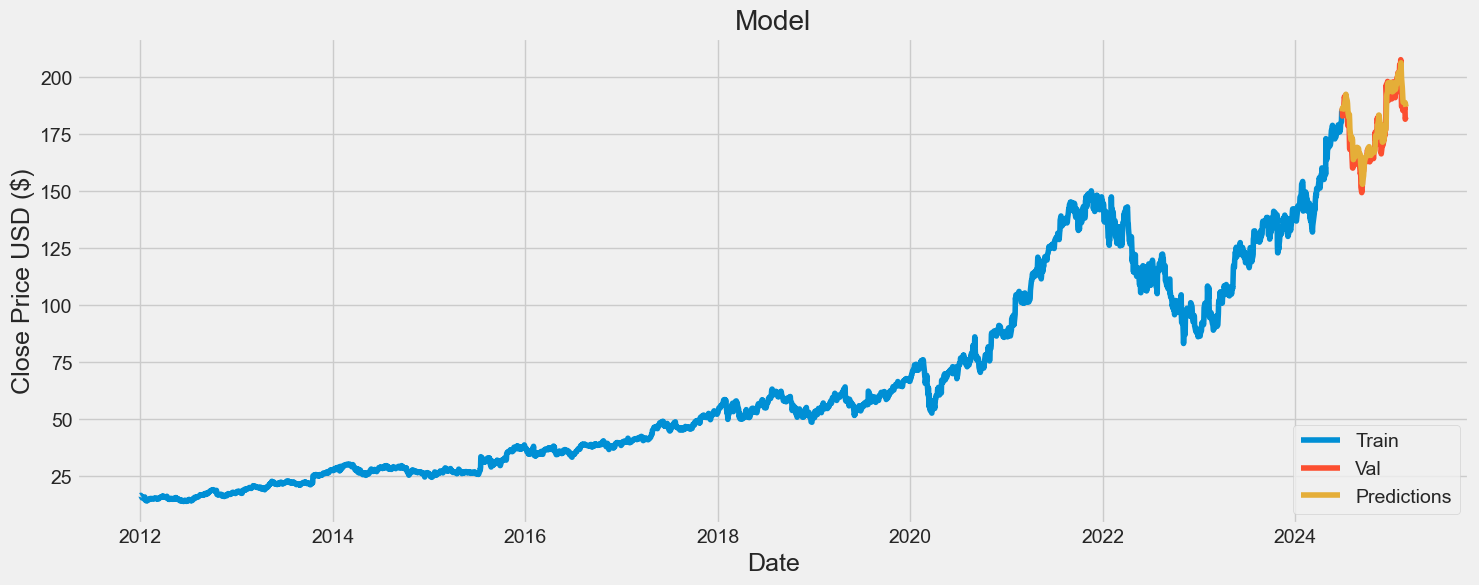

In [64]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['GOOG'])
plt.plot(valid[['GOOG', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [65]:
# Show the valid and predicted prices
valid

Ticker,GOOG,Predictions
Date,,
2024-06-27,186.402878,185.022842
2024-06-28,182.971283,186.581558
2024-07-01,184.038681,186.379639
2024-07-02,186.153488,186.215546
2024-07-03,186.931564,186.787262
...,...,...
2025-02-18,185.800003,188.928421
2025-02-19,187.130005,188.578323
2025-02-20,186.639999,188.736725
